# Ejercicio 1

Implemente el algoritmo de perceptron simple con función de activación escalón y utilícelo para
aprender los siguientes problemas:

*   Función lógica ’Y’ con entradas x = {{−1, 1}, {1, −1}, {−1, −1}, {1, 1}}, y salida esperada y = {−1,
−1, −1, 1}.

*   Función lógica ’O exclusivo’ con entradas x = {{−1, 1}, {1, −1}, {−1, −1}, {1, 1}}, y salida
esperada y = {1, 1, −1, −1}.

¿Qué puede decir acerca de los problemas que puede resolver el perceptron simple escalón en
relación a la resolución de los problemas que se le pidió que haga que el perceptron aprenda?

In [ ]:
"""
Pseudocodigo del perceptron simple

i=0
w=zeros(N+1,1)
error=1
error_min=p*2
While error >0 and i < COTA
  Tomar un numero i_x al azar entre -1 y p
  calcular la exitacion h=x[i_x]w
  calcular la activacion 0=signo(h)
  deltaW= n*(y[i_x]-O).x[i_x]
  w= w + deltaW
  error=CalcularError(x,y,w,p)

  if error < error_min

    error_min = error
    w_min = w
  end
  i=i+1
end
"""

*   ENTRENAMOS AL PERCEPTRÓN SIMPLE

In [ ]:
import numpy as np

# Función de activación escalón
def funcion_escalon(h):
  if h >= 0:
    return 1
  else:
    return -1

# Entrenamiento del perceptrón
def entrenar_perceptron(entradas, salidas_deseadas, tasa_aprendizaje=0.1, max_iteraciones=100):
  # Inicializamos pesos en 1 y bias en 1
  pesos = np.zeros(entradas.shape[1])
  bias = 1
  i = 0

  while i < max_iteraciones:
    errores = 0
    for x in range(len(entradas)):
      # Calcular la suma ponderada de las entradas, más el bias
      suma = np.dot(entradas[x], pesos) + bias

      # Obtener la salida usando la función de activación
      salida_obtenida = funcion_escalon(suma)

      # Calcular el error
      error = salidas_deseadas[x] - salida_obtenida

      if error != 0:
        # Ajustar los pesos y bias
        pesos = pesos + tasa_aprendizaje * error * entradas[x]
        bias = bias + tasa_aprendizaje * error
        errores += 1

    if errores == 0:
        print("El perceptrón aprendió correctamente en la iteración:", i+1)
        break
    i += 1

  return pesos, bias

# Función para predecir con el perceptrón entrenado
def prediccion(entradas, pesos, bias):
  predicciones = []

  for i in range(len(entradas)):
    # Calcular la suma ponderada de las entradas, más el bias
    suma = np.dot(entradas[i], pesos) + bias

    # El resultado de las predicciónes se agrega a la lista
    predicciones.append (funcion_escalon(suma))
  return np.array(predicciones)

* IMPRIMIMOS LAS PREDICCIÓNES DE LA FUNCIÓN LOGICA Y DEL PERCEPTRÓN SIMPLE

In [ ]:
entradas = np.array ([[-1,1], [1 ,-1], [-1, -1], [1, 1]])
salidas_deseadas_y = np.array ([-1, -1, -1, 1])

# Función lógica Y
pesos_y ,bias_y = entrenar_perceptron(entradas, salidas_deseadas_y)
predicciones_y = prediccion(entradas, pesos_y, bias_y)
print("Resultados para la función lógica Y:")
print("Entradas:", entradas)
print("Salidas deseadas:", salidas_deseadas_y)
print("Predicciones:    ", predicciones_y)

El perceptrón aprendió correctamente en la iteración: 4
Resultados para la función lógica Y:
Entradas: [[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Salidas deseadas: [-1 -1 -1  1]
Predicciones:     [-1 -1 -1  1]


* IMPRIMIMOS LAS PREDICCIÓNES DE LA FUNCIÓN LOGICA O DEL PERCEPTRÓN SIMPLE

In [ ]:
salidas_deseadas_o = np.array ([1, 1, -1, -1])

# Función lógica O
pesos_o ,bias_o = entrenar_perceptron(entradas, salidas_deseadas_o)
predicciones_o = prediccion(entradas, pesos_o, bias_o)
print("Resultados para O:")
print("Entradas:", entradas)
print("Salidas deseadas:", salidas_deseadas_o)
print("Predicciones:    ", predicciones_o)

Resultados para O:
Entradas: [[-1  1]
 [ 1 -1]
 [-1 -1]
 [ 1  1]]
Salidas deseadas: [ 1  1 -1 -1]
Predicciones:     [-1 -1 -1 -1]


* GRAFICAMOS LA FUNCIÓN LÓGICA Y DEL PERCEPTRÓN SIMPLE

[-1.1  1.1] [ 1.3 -0.9]


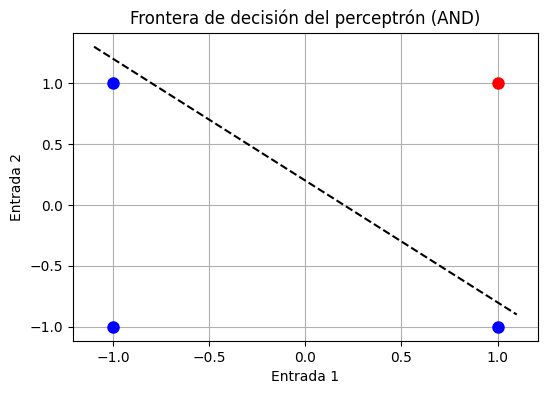

In [ ]:
import matplotlib.pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(6, 4))

# Graficamos los puntos de datos
for i in range(len(entradas)):
  if salidas_deseadas_y[i] == 1:
    # Puntos color rojo para clase 1
    plt.plot(entradas[i, 0], entradas[i, 1], 'ro', markersize=8)
  else:
    # Puntos color azul para clase -1
    plt.plot(entradas[i, 0], entradas[i, 1], 'bo', markersize=8)

# Obtenemos los limites actuales del eje X del gráfico
x_linea_y = np.array(plt.gca().get_xlim())
y_linea_y = -(pesos_y[0] * x_linea_y + bias_y) / pesos_y[1]
print(x_linea_y, y_linea_y)

# Graficamos la linea de separación
plt.plot(x_linea_y, y_linea_y, '--k')  # Líneas negras

plt.title('Frontera de decisión del perceptrón (AND)')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.grid(True)  # Agrega la cuadrícula
plt.show()

* GRAFICAMOS LA FUNCIÓN LÓGICA O DEL PERCEPTRÓN SIMPLE

[-1.1  1.1] [ 0.1 -2.1]


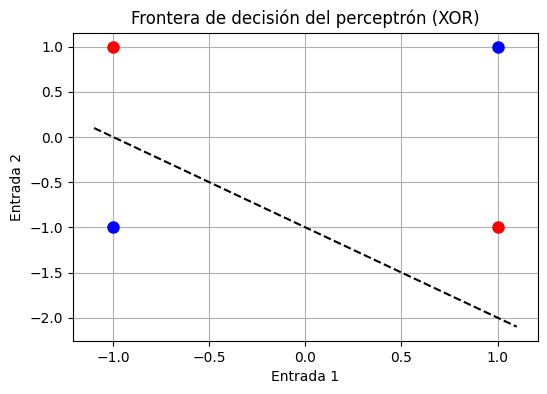

In [ ]:
import matplotlib.pyplot as plt

# Tamaño del gráfico
plt.figure(figsize=(6, 4))

# Graficar los puntos de datos
for i in range(len(entradas)):
  if salidas_deseadas_o[i] == 1:
    # Puntos color rojo para clase 1
    plt.plot(entradas[i, 0], entradas[i, 1], 'ro', markersize=8)
  else:
    # Puntos color azul para clase -1
    plt.plot(entradas[i, 0], entradas[i, 1], 'bo', markersize=8)

# Obtenemos los limites actuales del eje X del gráfico
x_linea_o = np.array(plt.gca().get_xlim())
y_linea_o = -(pesos_o[0] * x_linea_o + bias_o) / pesos_o[1]
print(x_linea_o, y_linea_o)

# Graficamos la linea de separación
plt.plot(x_linea_o, y_linea_o, '--k')  # Líneas negras

plt.title('Frontera de decisión del perceptrón (XOR)')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.grid(True)  # Agrega la cuadrícula
plt.show()

Si bien el perceptron simple funciona para Y no es efectivo a la hora de el XOR ya que NO es un problema linealmente separable

# Ejercicio 2

Implemente el algoritmo del perceptron simple lineal y perceptron simple no lineal y utilízalos para
aprender el problema especificado en los archivos Conjunto-entrenamiento.txt y
Salida-deseada.txt.

*   Evalúe la capacidad del perceptron simple lineal y perceptron simple no lineal para aprender la
función cuyas muestras están presentes en los archivos indicados.

*   Evalúe la capacidad de generalización del perceptron simple no lineal utilizando, de los datos
provistos, un subconjunto de ellos para entrenar y otro subconjunto para testear.

*   ¿Cómo podría escoger el mejor conjunto de entrenamiento?

*   ¿Cómo podría evaluar la máxima capacidad de generalización del perceptron para este
conjunto de datos?

* CARGAMOS LOS DATOS (.TXT)

In [ ]:
import numpy as np

# Cargamos los archivos
X_entrada = np.loadtxt('/content/Conjunto-entrenamiento.txt')
y_salida = np.loadtxt('/content/Salida-deseada.txt')

# Mostramos la forma de los datos
print("Dimensión del conjunto de entrenamiento:", X_entrada.shape)
print("Dimensión del vector de salida:", y_salida.shape)

Dimensión del conjunto de entrenamiento: (200, 3)
Dimensión del vector de salida: (200,)


* ENTRENAMOS AL PERCEPTRÓN SIMPLE LINEAL

In [ ]:
# Entrenamiento del perceptrón lineal
def entrenar_perceptron_simple_lineal(entradas, salidas_deseadas, tasa_aprendizaje=0.0001, max_iteraciones=1000):
  n_muestras, n_caracteristicas = entradas.shape

  # Inicialización de pesos y bias
  pesos = np.ones(n_caracteristicas)
  bias = 0
  i = 0
  errores_por_epoca = []

  for i in range(max_iteraciones):  # (while i < max_iteraciones) con esto es lo mismo
    errores = 0
    for x in range(n_muestras):
      # Función identidad
      salida = np.dot(entradas[x], pesos) + bias
      error = salidas_deseadas[x] - salida
      pesos = pesos + tasa_aprendizaje * error * entradas[x]
      bias = bias + tasa_aprendizaje * error
      errores += error**2
    errores_por_epoca.append(errores / n_muestras)
    #i += 1
  return pesos, bias, errores_por_epoca

# Entrenar
pesos_lineal, bias_lineal, errores_por_epoca_lineal = entrenar_perceptron_simple_lineal(X_entrada, y_salida)

# Predicciones
def predecir_simple_lineal(entradas, pesos, bias):
  return np.dot(entradas, pesos) + bias

y_pred_lineal = predecir_simple_lineal(X_entrada, pesos_lineal, bias_lineal)

# Evaluación
mse = np.mean((y_salida - y_pred_lineal) ** 2)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 92.57472207326165


* IMPRIMIMOS LAS ENTRADAS Y SALIDAS DEL PERCEPTRÓN SIMPLE LINEAL

In [ ]:
# Mostramos las primeras 10 salidas deseadas vs predicciones
print("Primeras 10 predicciones")
print("------------------------")
for i in range(10):
  print(f"{y_salida[i]:10.4f}{y_pred_lineal[i]:10.4f}")

Primeras 10 predicciones
------------------------
   87.3174   75.0805
    1.5257   -4.2656
   39.7859   45.9045
   45.5674   48.4201
   13.3589   25.0393
   74.5119   63.7347
    3.3358    4.3077
    4.2974    8.8998
   66.5833   58.1313
   26.0005   35.2797


* GRAFICAMOS EL MSE DEL PERCEPTRÓN SIMPLE LINEAL

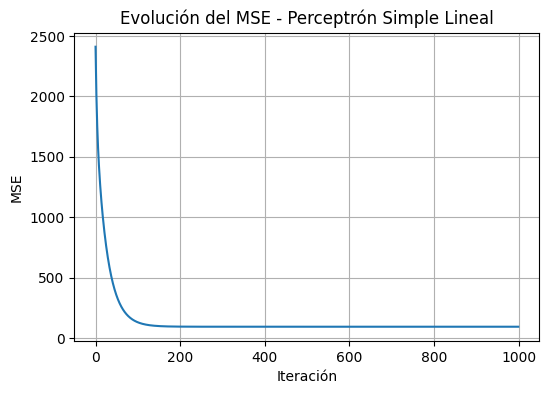

In [ ]:
# Graficamos MSE por cada epoca del perceptrón simple lineal
plt.figure(figsize=(6, 4))
plt.plot(errores_por_epoca_lineal)
plt.title('Evolución del MSE - Perceptrón Simple Lineal')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

* GRAFICAMOS LA ENTRADA, SALIDAS Y LAS PREDICCIONES DEL PERCEPTRÓN SIMPLE LINEAL

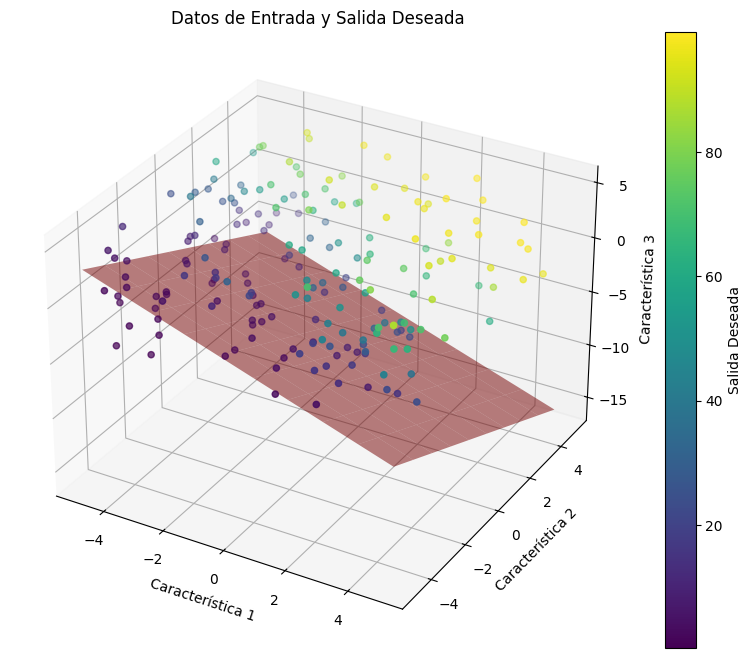

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura y el eje 3D
figura = plt.figure(figsize=(10, 8))
eje3d = figura.add_subplot(111, projection='3d')

# Graficar los datos de entrada con colores representando la salida deseada
sc = eje3d.scatter(X_entrada[:, 0], X_entrada[:, 1], X_entrada[:, 2], c=y_salida, cmap='viridis', marker='o')

# Crear el plano de decisión
malla_x, malla_y = np.meshgrid(np.linspace(X_entrada[:, 0].min(), X_entrada[:, 0].max(), 10),
                              np.linspace(X_entrada[:, 1].min(), X_entrada[:, 1].max(), 10))
malla_z = (-pesos_lineal[0] * malla_x - pesos_lineal[1] * malla_y - bias_lineal) / pesos_lineal[2]

# Graficar el plano de decisión
eje3d.plot_surface(malla_x, malla_y, malla_z, alpha=0.5, color='red')

# Añadir etiquetas a los ejes
eje3d.set_xlabel('Característica 1')
eje3d.set_ylabel('Característica 2')
eje3d.set_zlabel('Característica 3')

# Añadir barra de color para interpretar los valores de salida
cbar = plt.colorbar(sc, ax=eje3d)
cbar.set_label('Salida Deseada')

# Añadir título al gráfico
plt.title('Datos de Entrada y Salida Deseada')

# Mostrar el gráfico
plt.savefig("datos_entrada_salida_3d.png")

* ENTRENAMOS AL PERCEPTRÓN SIMPLE NO LINEAL

In [ ]:
from sklearn.preprocessing import StandardScaler

# Escalar entrada y salida
scaler_X = StandardScaler()
X_entrada_e = scaler_X.fit_transform(X_entrada)

# Escalamos la salida al rango [0, 1]
y_salida_e = y_salida / 100

In [ ]:
import numpy as np

# Función de activación sigmoide y su derivada
def sigmoide(x):
  return 1 / (1 + np.exp(-x))

def derivada_sigmoide(x):
  s = sigmoide(x)
  return s * (1 - s)

# Entrenamiento del perceptrón no lineal
def entrenar_perceptron_simple_no_lineal(entradas, salidas_deseadas, tasa_aprendizaje=0.01, max_iteraciones=1000):
  n_muestras, n_caracteristicas = entradas.shape

  # Inicialización de pesos y bias
  pesos = np.ones(n_caracteristicas)
  bias = 0
  i = 0
  errores_por_epoca = []

  for i in range(max_iteraciones):
    errores = 0
    for x in range(n_muestras):
      # Función sigmoide
      suma = np.dot(entradas[x], pesos) + bias
      salida = sigmoide(suma)
      error = salidas_deseadas[x] - salida

      # Ajustamos todo
      delta = error * derivada_sigmoide(suma)
      pesos = pesos + tasa_aprendizaje * delta * entradas[x]
      bias = bias + tasa_aprendizaje * delta

      errores += error**2
    errores_por_epoca.append(errores / n_muestras)
  return pesos, bias, errores_por_epoca

def predecir_simple_no_lineal(entradas, pesos, bias):
  suma = np.dot(entradas, pesos) + bias
  return sigmoide(suma)

# Entrenar
pesos_no_lineal, bias_no_lineal, errores_por_epoca_no_lineal = entrenar_perceptron_simple_no_lineal(X_entrada_e, y_salida_e)

# Predicciones
y_pred_no_lineal = predecir_simple_no_lineal(X_entrada_e, pesos_no_lineal, bias_no_lineal)

# Reescalamos al rango original [0, 100]
y_pred_reescalado = y_pred_no_lineal * 100

# Evaluación
mse = np.mean((y_salida - y_pred_reescalado) ** 2)
print("Error cuadrático medio:", mse)

Error cuadrático medio: 5.991317102680915e-06


* IMPRIMIMOS LAS ENTRADAS Y SALIDAS DEL PERCEPTRÓN SIMPLE NO LINEAL

In [ ]:
# Mostramos las primeras 10 salidas deseadas vs predicciones
print("Primeras 10 predicciones")
print("------------------------")
for i in range(10):
    print(f"{y_salida[i]:10.4f}{y_pred_reescalado[i]:10.4f}")

Primeras 10 predicciones
------------------------
   87.3174   87.3136
    1.5257    1.5267
   39.7859   39.7878
   45.5674   45.5678
   13.3589   13.3623
   74.5119   74.5086
    3.3358    3.3376
    4.2974    4.2996
   66.5833   66.5804
   26.0005   26.0032


* GRAFICAMOS EL MSE DEL PERCEPTRÓN SIMPLE NO LINEAL

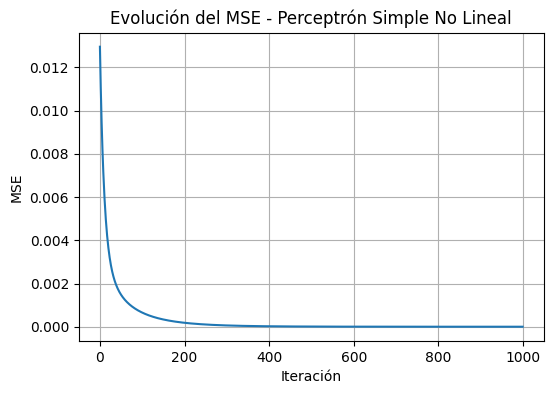

In [ ]:
# Graficamos MSE por cada epoca del perceptrón simple lineal
plt.figure(figsize=(6, 4))
plt.plot(errores_por_epoca_no_lineal)
plt.title('Evolución del MSE - Perceptrón Simple No Lineal')
plt.xlabel('Iteración')
plt.ylabel('MSE')
plt.grid(True)
plt.show()

* GRAFICAMOS LA ENTRADA, SALIDAS Y LAS PREDICCIONES DEL PERCEPTRÓN SIMPLE NO LINEAL

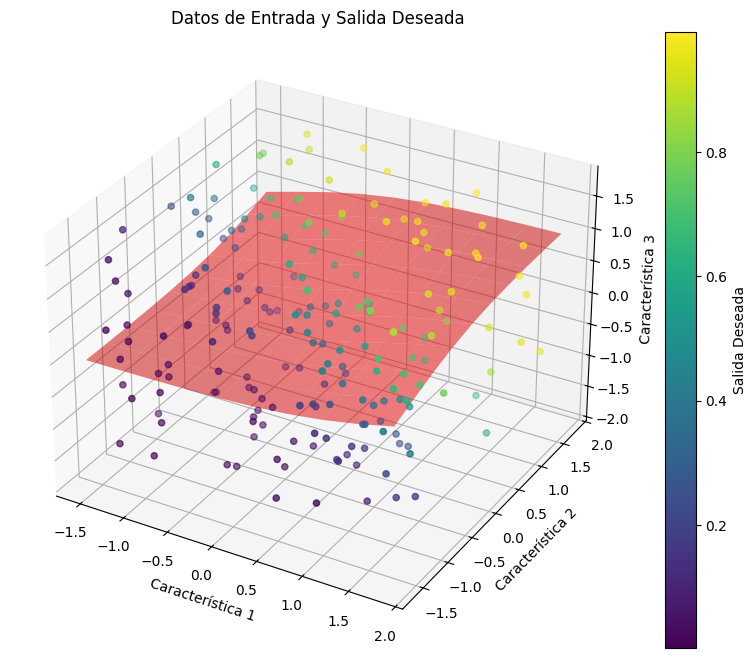

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Creamos la figura y el eje 3D
figura = plt.figure(figsize=(10, 8))
eje3d = figura.add_subplot(111, projection='3d')

# Graficar los datos de entrada con colores representando la salida deseada
sc = eje3d.scatter(X_entrada_e[:, 0], X_entrada_e[:, 1], X_entrada_e[:, 2], c=y_salida_e, cmap='viridis', marker='o')

# Crear el plano de decisión
malla_x, malla_y = np.meshgrid(np.linspace(X_entrada_e[:, 0].min(), X_entrada_e[:, 0].max(), 10),
                              np.linspace(X_entrada_e[:, 1].min(), X_entrada_e[:, 1].max(), 10))
malla_z = predecir_simple_no_lineal(np.array([malla_x.flatten(), malla_y.flatten(), np.zeros_like(malla_x.flatten())]).T, pesos_no_lineal, bias_no_lineal).reshape(malla_x.shape)

# Graficar el plano de decisión
eje3d.plot_surface(malla_x, malla_y, malla_z, alpha=0.5, color='red')

# Añadir etiquetas a los ejes
eje3d.set_xlabel('Característica 1')
eje3d.set_ylabel('Característica 2')
eje3d.set_zlabel('Característica 3')

# Añadir barra de color para interpretar los valores de salida
cbar = plt.colorbar(sc, ax=eje3d)
cbar.set_label('Salida Deseada')

# Añadir título al gráfico
plt.title('Datos de Entrada y Salida Deseada')

# Mostrar el gráfico
plt.savefig("datos_entrada_salida_3d.png")

● Evalúe la capacidad de generalización del perceptron simple no lineal utilizando, de los datos provistos, un subconjunto de ellos para entrenar y otro subconjunto para testear.

* EVALUAMOS LA CAPACIDAD DE GENERALIZACIÓN DEL PERCEPTRÓN SIMPLE NO LINEAL

In [ ]:
from sklearn.model_selection import train_test_split

# Dividir en entrenamiento y test
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_entrada_e, y_salida_e, test_size=0.3, random_state=42)

# Entrenar el perceptrón
pesos_no_lineal, bias_no_lineal, errores_por_epoca_no_lineal = entrenar_perceptron_simple_no_lineal(X_train_e, y_train_e)

# Evaluar
y_train_pred = predecir_simple_no_lineal(X_train_e, pesos_no_lineal, bias_no_lineal)
y_test_pred = predecir_simple_no_lineal(X_test_e, pesos_no_lineal, bias_no_lineal)

# Reescalamos de 0 a 100
y_train_pred_reesc = y_train_pred * 100
y_test_pred_reesc = y_test_pred * 100
y_train_real = y_train_e * 100
y_test_real = y_test_e * 100

mse_train = np.mean((y_train_real - y_train_pred_reesc) ** 2)
mse_test = np.mean((y_test_real - y_test_pred_reesc) ** 2)

print("Error cuadrático medio en entrenamiento:", mse_train)
print("Error cuadrático medio en test:", mse_test)

Error cuadrático medio en entrenamiento: 0.000589989107493745
Error cuadrático medio en test: 0.0007049831043490864


*   ¿Cómo podría escoger el mejor conjunto de entrenamiento?
    *   **Representatividad**: Asegúrate de que el conjunto regleje la diversidad y distribución de los datos reales.
    *   **Tamaño**: Un conjunto grande mejora el rendimiento, pero hay un límite en la mejora.
    *   **Calidad**: Limpia y reprocesa los datos, eliminando valores atípicos y datos faltantes.
    *   **Validación cruzada**: Usa técnicas como k-fold para evaluar el modelo en varios subconjuntos.
    *   **División adecuada**: Divide los datos en entrenamiento, validación y prueba para un modelo robusto.
    *   **Muestreo**: Utiliza muestreo estratificado o sobremuestreo/submuestreo para equilibrar los datos.







*   ¿Cómo podría evaluar la máxima capacidad de generalización del perceptron para este conjunto de datos?


    *   **Divide los datos**: Usa conjuntos de entrenamiento, validación y prueba para evaluar el rendimiento del modelo en datos no vistos.
    *   **Métricas de evaluación**: Utiliza métricas como MSE para regresión y precisión/recuperación/F1-score para clasificación.
    *   **Ajuste de hiperparámetros**: Experimenta con la tasa de aprendizaje, iteraciones y función de activación para optimizar el modelo.
    *   **Análisis de curvas de aprendizaje**: Observa las curvas de error de entrenamiento y validación para detectar sobreajuste o subajuste.
    *   **Evaluación final**: Mide el rendimiento en el conjunto de prueba para obtener una estimación imparcial de la generalización.